### 워드클라우드

#### 필요한 패키지 불러오기:

In [1]:
# 처음엔 설치 필요!
# !pip install wordcloud
# !pip install nltk
# 다음은 한번만 실행한다.
# nltk.download()
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import nltk
import re
import os
import matplotlib.pyplot as plt
from PIL import Image                         # Pillow 패키지의 영상 핸들링 클래스.
# from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
%matplotlib inline

#### 데이터 읽어오기:

In [2]:
#os.chdir(r"C:\Users\sycha_000\Documents\교육사업\20190212_Python 머신러닝\data")
os.chdir(r"..\data")
f = open("book_three_little_pigs.txt",'r',encoding='UTF-8')
my_book = f.readlines()
f.close()

#### 전처리:

In [3]:
n_min = 4                                                           # 최소 문자 개수. 
corpus = []
#lemmatizer = WordNetLemmatizer()
for a_line in my_book:
    pre = re.sub(r'\W', ' ', a_line)                                # 특수문자 제외.
    pre = re.sub(r'_', ' ', pre)                                    # 특수문자 제외.
    pre = re.sub(r'\d+','', pre)                                    # 수자 제외. 
    pre = nltk.word_tokenize(pre)
    pre = [x for x in pre if len(x) > n_min]                        # 최소 길이 충족.
    pre = [x.lower() for x in pre]                                  # 소문자화.
    pre = [x for x in pre if x not in stopwords.words('english')]   # 불용어 처리.
#    pre = [lemmatizer.lemmatize(x) for x in pre]                    # 원형 복원.
    corpus += pre                                                   # 단어를 말뭉치에 추가.

#### 키워드 추출 (Option):

In [4]:
# Series 로 변환.
my_series = pd.Series(corpus)

In [5]:
# 도수 분포표. Top 10
my_word_counts = my_series.value_counts().sort_values(ascending=False)
my_word_counts[:10]

little        33
house         14
puffed         6
huffed         6
ready          5
frightened     4
coming         4
clock          3
built          3
could          3
dtype: int64

#### 워드 클라우드 기본형 생성:

In [6]:
# 다음은 워드클라우드의 요구사항.
a_long_sentence = ' '.join(corpus)

In [7]:
wc = WordCloud(background_color='white', max_words=30)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
wc.words_

{'little': 1.0,
 'house': 0.42424242424242425,
 'huffed': 0.18181818181818182,
 'puffed': 0.18181818181818182,
 'ready': 0.15151515151515152,
 'apple': 0.12121212121212122,
 'coming': 0.12121212121212122,
 'frightened': 0.12121212121212122,
 'please': 0.09090909090909091,
 'build': 0.09090909090909091,
 'built': 0.09090909090909091,
 'chiny': 0.09090909090909091,
 'bricks': 0.09090909090909091,
 'clock': 0.09090909090909091,
 'churn': 0.09090909090909091,
 'three': 0.06060606060606061,
 'bundle': 0.06060606060606061,
 'straw': 0.06060606060606061,
 'along': 0.06060606060606061,
 'answered': 0.06060606060606061,
 'furze': 0.06060606060606061,
 'field': 0.06060606060606061,
 'turnips': 0.06060606060606061,
 'tomorrow': 0.06060606060606061,
 'morning': 0.06060606060606061,
 'dinner': 0.06060606060606061,
 'angry': 0.06060606060606061,
 'bought': 0.06060606060606061,
 'butter': 0.06060606060606061,
 'going': 0.06060606060606061}

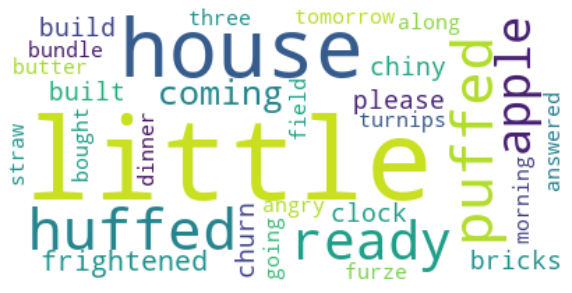

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

#### 워드 클라우드 매스크 사용형 생성:

In [9]:
# 백그라운드 마스크
#img = Image.open('background_1.png')                    # 타원형.
#img = Image.open('background_2.png')                   # 말풍선.
img = Image.open('background_3.png')                    # 하트.
back_mask = np.array(img)

In [10]:
wc = WordCloud(background_color='white', max_words=30, mask=back_mask)            # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence) 

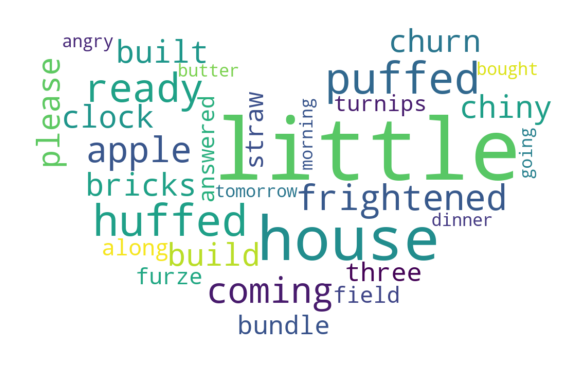

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()